#Pandas introduction and exploratory data analysis

---
In this document I will perform an exploratory data analysis using pandas, numpy, seaborn and matplot. The objective is to put to work my knowledge of these libraries while exploring the database I chose.

I will search for evidence of differences in salaries depending on sex. For that, the variables considered will be also race, years of experience, age and level of education.

In [2]:
# I import the libraries I will be using
import numpy as np
import pandas as pd

import matplotlib as mlt 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats

from google.colab import files # Librería propia de google para cargar archivos de forma local

In [ ]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import opendatasets as od

In [ ]:
od.download('https://www.kaggle.com/datasets/rkiattisak/salaly-prediction-for-beginer')

In [3]:
uploaded = files.upload()

Saving Salary Data.csv to Salary Data.csv


##About the dataset

The database contains information about the salaries of employees at a company. Each row represents a different employee, and the columns include information such as age, gender, education level, job title, years of experience, and salary.

Source: https://www.kaggle.com/datasets/rkiattisak/salaly-prediction-for-beginer

**Variables**

*   *Age*: This column represents the age of each employee in years. The values in this column are numeric.

*   *Gender*: This column contains the gender of each employee, which can be either male or female. The values in this column are categorical.

*   *Education Level*: This column contains the educational level of each employee, which can be high school, bachelor's degree, master's degree, or PhD. The values in this column are categorical.

*   *Job Title*: This column contains the job title of each employee. The job titles can vary depending on the company and may include positions such as manager, analyst, engineer, or administrator. The values in this column are categorical.

*   *Years of Experience*: This column represents the number of years of work experience of each employee. The values in this column are numeric.

*   *Salary*: This column represents the annual salary of each employee in US dollars. The values in this column are numeric and can vary depending on factors such as job title, years of experience, and education level.

In [4]:
#I will import the dataset 
df=pd.read_csv('Salary Data.csv')
df.head(10)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
5,29.0,Male,Bachelor's,Marketing Analyst,2.0,55000.0
6,42.0,Female,Master's,Product Manager,12.0,120000.0
7,31.0,Male,Bachelor's,Sales Manager,4.0,80000.0
8,26.0,Female,Bachelor's,Marketing Coordinator,1.0,45000.0
9,38.0,Male,PhD,Senior Scientist,10.0,110000.0


In [5]:
# Some exploratory commands
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


The database contains 375 entries and 6 variables. As mentioned above, it is a cross sectional dataset. I need to transform the variables `Gender`, `Job Title` and `Education Level` in order to be able to perform operations with them. 

##Previous data treatment

In [6]:
# First, I need to know all possible values of each variable 
for col in ['Gender', 'Education Level']:
    freq = df[col].value_counts()
    print(f'Absolute frequency for {col}:')
    print(freq)
    print('\n')

Absolute frequency for Gender:
Male      194
Female    179
Name: Gender, dtype: int64


Absolute frequency for Education Level:
Bachelor's    224
Master's       98
PhD            51
Name: Education Level, dtype: int64




In [7]:
job_titles = df['Job Title'].unique()
print(job_titles)
len(job_titles)

['Software Engineer' 'Data Analyst' 'Senior Manager' 'Sales Associate'
 'Director' 'Marketing Analyst' 'Product Manager' 'Sales Manager'
 'Marketing Coordinator' 'Senior Scientist' 'Software Developer'
 'HR Manager' 'Financial Analyst' 'Project Manager' 'Customer Service Rep'
 'Operations Manager' 'Marketing Manager' 'Senior Engineer'
 'Data Entry Clerk' 'Sales Director' 'Business Analyst' 'VP of Operations'
 'IT Support' 'Recruiter' 'Financial Manager' 'Social Media Specialist'
 'Software Manager' 'Junior Developer' 'Senior Consultant'
 'Product Designer' 'CEO' 'Accountant' 'Data Scientist'
 'Marketing Specialist' 'Technical Writer' 'HR Generalist'
 'Project Engineer' 'Customer Success Rep' 'Sales Executive' 'UX Designer'
 'Operations Director' 'Network Engineer' 'Administrative Assistant'
 'Strategy Consultant' 'Copywriter' 'Account Manager'
 'Director of Marketing' 'Help Desk Analyst' 'Customer Service Manager'
 'Business Intelligence Analyst' 'Event Coordinator' 'VP of Finance'
 'G

175

To transform these variables, I can define dictionaries for `Gender` and  `Education Level`. For the variable `Job Title`, the treatment should be different due to the fact that it cointains many possible values (175!). In order to be able to handle this, I will classificate this variable into lesser categories. This will probably increase the measurement error of the variable, but it will allow me to perform operations on the variable. Of course, other categorization could be possible.




In [8]:
# Gender
gender_dict = {'Male': '1', 'Female': '2'}
df['gender_str'] = df['Gender'].map(gender_dict)

# The inverted dictionary
gender_dict_inv={v: k for k,v in gender_dict.items()}
df['gender_str']=df['gender_str'].replace(gender_dict_inv)

# Final check
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,gender_str
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,Male
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,Female
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Male
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,Female
4,52.0,Male,Master's,Director,20.0,200000.0,Male


In [9]:
# Education Level
education_dict={"Bachelor's":'1',"Master's":'2','PhD':'3'}
df['education_str']=df['Education Level'].map(education_dict)

# Inverted dictionary
education_dict_inv={v: k for k,v in education_dict.items()}
df['education_str']=df['education_str'].replace(education_dict_inv)

# Final checks
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,gender_str,education_str
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,Male,Bachelor's
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,Female,Master's
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Male,PhD
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,Female,Bachelor's
4,52.0,Male,Master's,Director,20.0,200000.0,Male,Master's


Now, I need to work with the `Job Title` variable. For the moment, I wil define a dictionary to give values if there is a certain word in the occupation name as follows:

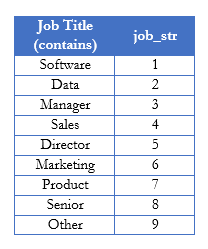

In [10]:
job_dict = {'Software': '1', 'Data': '2', 'Manager': '3', 'Sales': '4', 'Director': '5', 'Marketing': '6', 'Product': '7', 'Senior': '8', 'Other': '9'}

def map_job_title(title):
    if isinstance(title, str):
        for word in title.split():
            if word in job_dict:
                return job_dict[word]
        return '9'
    else:
        return '9'

df['Job Title'] = df['Job Title'].fillna('')
df['job_str'] = df['Job Title'].apply(map_job_title)
df.head()


,Age,Gender,Education Level,Job Title,Years of Experience,Salary,gender_str,education_str,job_str
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,Male,Bachelor's,1
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,Female,Master's,2
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Male,PhD,8
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,Female,Bachelor's,4
4,52.0,Male,Master's,Director,20.0,200000.0,Male,Master's,5


In [11]:
# I control the value assignement
job_counts = df['job_str'].value_counts()
job_freq = round(df['job_str'].value_counts(normalize=True)*100, 2)

# I create a dataframe with absolute and relative frequencies
job_stats = pd.DataFrame({'Absolute frequency': job_counts, 'Relative frequency (%)': job_freq})
job_stats.index.name = 'job_str'

# I order the df
job_stats_sorted = job_stats.sort_index()
job_stats_sorted['cumulative frequency'] = job_stats_sorted['Relative frequency (%)'].cumsum()

# Final check
print(job_stats_sorted)

         Absolute frequency  Relative frequency (%)  cumulative frequency
job_str                                                                  
1                         7                    1.87                  1.87
2                         7                    1.87                  3.74
3                        28                    7.47                 11.21
4                        13                    3.47                 14.68
5                        40                   10.67                 25.35
6                        26                    6.93                 32.28
7                         8                    2.13                 34.41
8                       152                   40.53                 74.94
9                        94                   25.07                100.01


There is a 25% of occupations that does not contain any of the words specified. They could be looked directly to detect repetitions. I won't be doing that in this case. 

I will now give the values of the variable corresponding to each word.

In [12]:
# I create a dictionary to mal job_str values to the values of Job Title (inverse operation)
job_map = {'1': 'Software', '2': 'Data', '3': 'Manager', '4': 'Sales', '5': 'Director', '6': 'Marketing', '7': 'Product', '8': 'Senior', '9': 'Other'}

# Then I use it to replace the values
df['job_str'] = df['job_str'].replace(job_map)

# Check
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,gender_str,education_str,job_str
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,Male,Bachelor's,Software
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,Female,Master's,Data
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Male,PhD,Senior
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,Female,Bachelor's,Sales
4,52.0,Male,Master's,Director,20.0,200000.0,Male,Master's,Director


In [13]:
df=df.rename(columns={'Years of Experience':'experience','Salary':'wage'})

In [14]:
# I select only the columns I will need
data=df[['Age','gender_str','experience','wage','education_str','job_str']].copy()

In [15]:
print(data.columns)

Index(['Age', 'gender_str', 'experience', 'wage', 'education_str', 'job_str'], dtype='object')


In [16]:
# Lastly, I check for missing values
missing_rows = data[data.isna().any(axis=1)]
print(missing_rows)

     Age gender_str  experience  wage education_str job_str
172  NaN        NaN         NaN   NaN           NaN   Other
260  NaN        NaN         NaN   NaN           NaN   Other


In [17]:
columns_with_missing = data.columns[data.isna().sum() > 0]
print(columns_with_missing)

Index(['Age', 'gender_str', 'experience', 'wage', 'education_str'], dtype='object')


As there are only 2 registers with missings, I eliminaete these observations from the dataset. 

In [18]:
data=data.dropna()
missing_rows = data[data.isna().any(axis=1)]
print(missing_rows)

Empty DataFrame
Columns: [Age, gender_str, experience, wage, education_str, job_str]
Index: []


##Exploratory analysis

---
In this part, I will carry the proper EDA considering cuantitative variables on the one side, and cualitative on the other. I will firts analyse data individualy, and then I will carry a multivariate analysis. 

### Univariate analysis

#### Numeric variables 

In [19]:
# Age
print('Descriptive statistics for age')
data['Age'].describe().round(2)

Descriptive statistics for age


count    373.00
mean      37.43
std        7.07
min       23.00
25%       31.00
50%       36.00
75%       44.00
max       53.00
Name: Age, dtype: float64

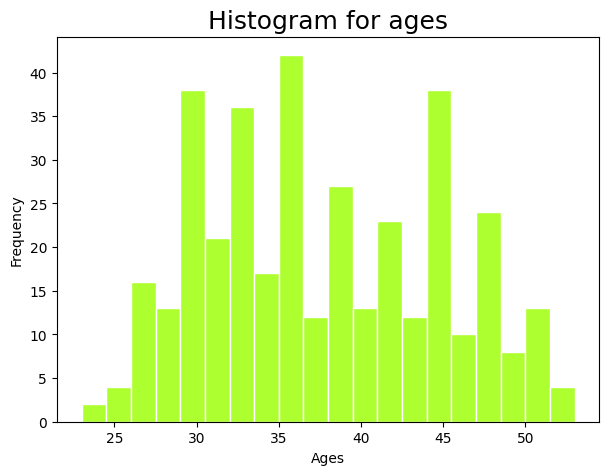

In [20]:
data['Age'].hist(bins=20,figsize=(7,5),grid=False,color='greenyellow',edgecolor='white')
plt.title('Histogram for ages',loc='center',fontsize=18)
plt.xlabel('Ages')
plt.ylabel('Frequency')

plt.show()

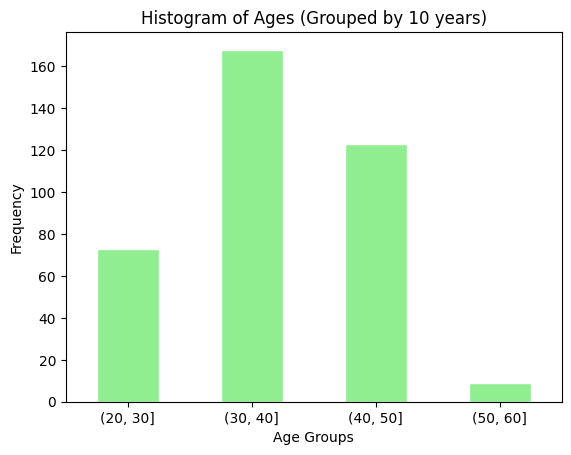

In [21]:
# Crear bins de 10 años
bins = range(20, 61, 10)

# Agrupar datos en los bins
age_groups = pd.cut(data['Age'], bins=bins)

# Generar histograma con los datos agrupados
age_groups.value_counts().sort_index().plot(kind='bar', color='lightgreen', edgecolor='white')

# Personalizar gráfico
plt.xticks(rotation=0)
plt.xlabel('Age Groups')
plt.ylabel('Frequency')
plt.title('Histogram of Ages (Grouped by 10 years)')
plt.show()

**Ages**: This employee cohort has an adult age, with a mean of 37 years old, a minimum of 23 and 53 years for the eldest worker. The more frecuent age group is (30-40].

In [22]:
# Experience
print('Descriptive statistics for experience')
data['experience'].describe().round(2)

Descriptive statistics for experience


count    373.00
mean      10.03
std        6.56
min        0.00
25%        4.00
50%        9.00
75%       15.00
max       25.00
Name: experience, dtype: float64

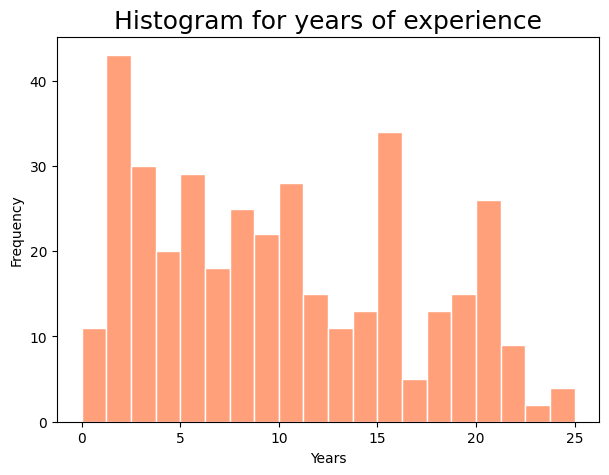

In [23]:
data['experience'].hist(bins=20,figsize=(7,5),grid=False,color='lightsalmon',edgecolor='white')
plt.title('Histogram for years of experience',loc='center',fontsize=18)
plt.xlabel('Years')
plt.ylabel('Frequency')
plt.show()

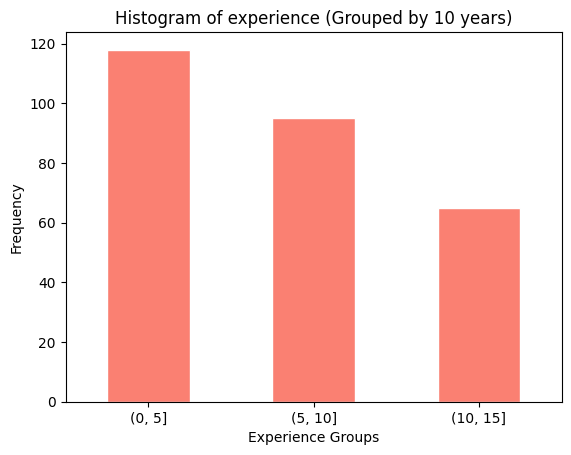

In [24]:
# Crear bins de 10 años
bins = range(0, 16, 5)

# Agrupar datos en los bins
experience_groups = pd.cut(data['experience'], bins=bins)

# Generar histograma con los datos agrupados
experience_groups.value_counts().sort_index().plot(kind='bar', color='salmon', edgecolor='white')

# Personalizar gráfico
plt.xticks(rotation=0)
plt.xlabel('Experience Groups')
plt.ylabel('Frequency')
plt.title('Histogram of experience (Grouped by 10 years)')
plt.show()

**Years of experience**: As to the years of experience, most of the workers have more than 5 years. Close to a third of the employee population has an atiquity of 0-5 years in the labor market.

In [25]:
# Wages 
print('descriptive statitics for wages')
data['wage'].describe()

descriptive statitics for wages


count       373.000000
mean     100577.345845
std       48240.013482
min         350.000000
25%       55000.000000
50%       95000.000000
75%      140000.000000
max      250000.000000
Name: wage, dtype: float64

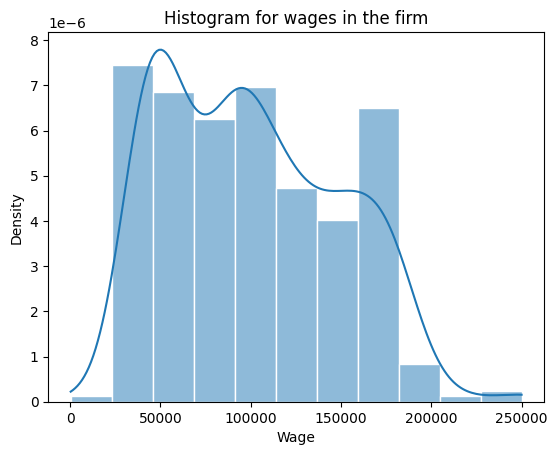

In [26]:
sns.histplot(data['wage'],kde=True,stat="density",edgecolor='white')
plt.xlabel('Wage')
plt.title('Histogram for wages in the firm')
plt.show()

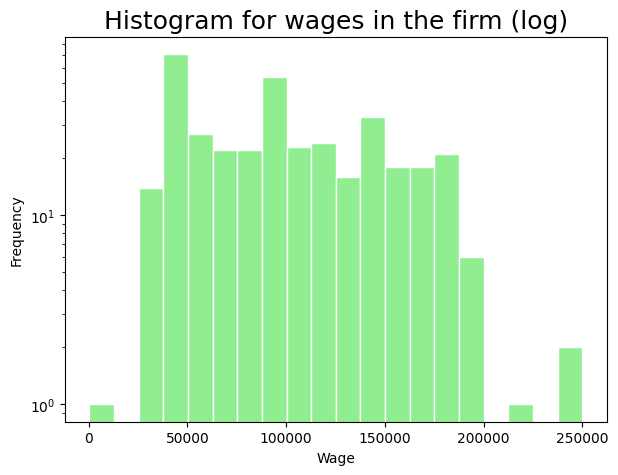

In [27]:
data['wage'].hist(bins=20,figsize=(7,5),grid=False,color='lightgreen',edgecolor='white',log=True)
plt.title('Histogram for wages in the firm (log)',loc='center',fontsize=18)
plt.xlabel('Wage')
plt.ylabel('Frequency')
plt.show()

**Wages**: as expected, the distribution for this variable has an assymetry to the left. That is to say, frecuencies are concentrated atound lower values of the variable.  However this concetration is not so marked, and the distribution could be characterized as platocurtic. These findings are corroborated by the assymetry and kurtosis coefficients:

In [28]:
from scipy.stats import skew, kurtosis
print("Assymetry: ", round(skew(data['wage']),3))
print("Kurtosis: ", round(kurtosis(data['wage']),2))

Assymetry:  0.399
Kurtosis:  -0.75


A positive assymetry coefficient indicates presence of assymetry to the left, while a negative kurtosis signals a platocurtic distribution (values are less concentrated than in a normal).

#### Cualitative variables

In [29]:
# Gender 
freq_abs=data['gender_str'].value_counts().rename('Frecuency')
freq_rel=data['gender_str'].value_counts(normalize=True).round(2).rename('Relative frequency')
tabla=pd.concat([freq_abs,freq_rel],axis=1)
print('Frecuency table for','gender')
tabla


Frecuency table for gender


,Frecuency,Relative frequency
Male,194,0.52
Female,179,0.48


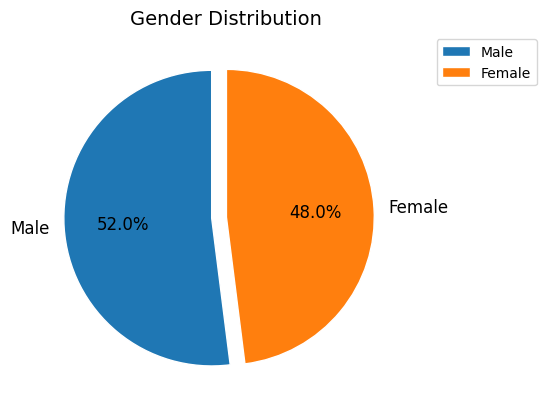

In [30]:
explode = (0.1, 0)
plt.pie(freq_rel.values, labels=freq_rel.index, autopct='%1.1f%%', explode=explode, startangle=90, textprops={'fontsize': 12}, wedgeprops={'edgecolor': 'white'})
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', frameon=True)
plt.title('Gender Distribution', fontsize=14)
plt.show()

**Gender:** It is a balaced dataset, with an equal participation between women and men. 

In [31]:
# Education level
freq_abs=data['education_str'].value_counts().rename('Frecuency')
freq_rel=data['education_str'].value_counts(normalize=True).round(2).rename('Relative frequency')
tabla=pd.concat([freq_abs,freq_rel],axis=1)
print('Frecuency table for','education level')
tabla

Frecuency table for education level


,Frecuency,Relative frequency
Bachelor's,224,0.60
Master's,98,0.26
PhD,51,0.14


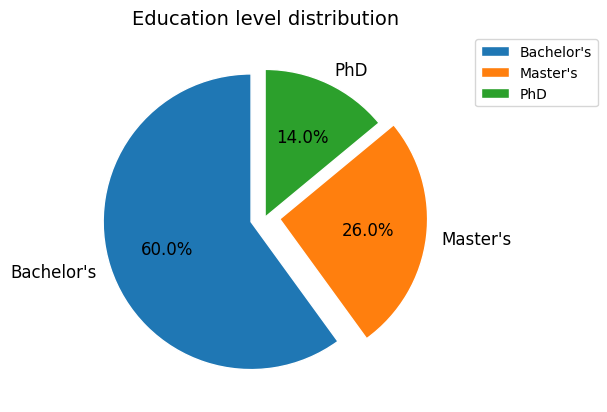

In [32]:
explode = (0.1,0.1, 0)
plt.pie(freq_rel.values, labels=freq_rel.index, autopct='%1.1f%%', explode=explode, startangle=90, textprops={'fontsize': 12}, wedgeprops={'edgecolor': 'white'})
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', frameon=True)
plt.title('Education level distribution', fontsize=14)
plt.show()

As to the **education level**, the most typical value es Bacelor with nearly two thirds of the population, followed by Master and PhD. 

### Multivariate analysis

In this section, I will carry an exploratory analysis to check whether there are differences in wages depending on gender. I will perform statistical tests to check statistically different hypothesis that could arise from the data.

#### Wage versus gender

In [33]:
# I create new fatasets with filtered observations by gender
data_m = data[data['gender_str'] == 'Male']
data_f = data[data['gender_str'] == 'Female']

# Descriptive statistics by gender
print(" Descriptive statistics for men:\n",'\n', data_m['wage'].describe().round(2))
print('\n')
print(" Descriptive statistics for women:\n",'\n', data_f['wage'].describe().round(2))

 Descriptive statistics for men:
 
 count       194.00
mean     103867.78
std       50182.46
min         350.00
25%       60000.00
50%       97500.00
75%      140000.00
max      250000.00
Name: wage, dtype: float64


 Descriptive statistics for women:
 
 count       179.00
mean      97011.17
std       45916.14
min       35000.00
25%       50000.00
50%       90000.00
75%      140000.00
max      190000.00
Name: wage, dtype: float64


There seems to be a diference in mean of around 6000 usd per annum. To check the statistical significance of this difference I will run a hypothesis test. 

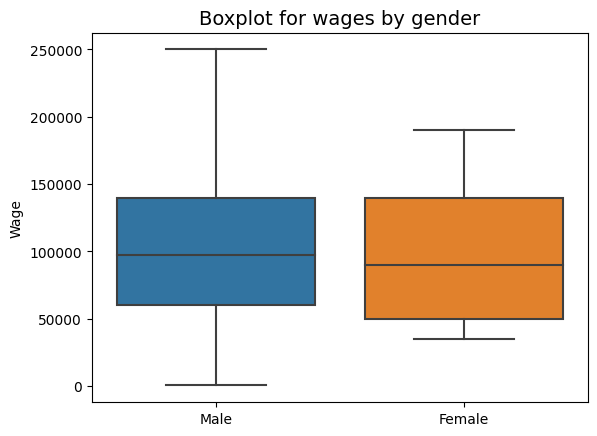

In [34]:
# Boxplots de variables numéricas agrupadas por género
sns.boxplot(x='gender_str', y='wage', data=data)
plt.xlabel('')
plt.ylabel('Wage')
plt.title('Boxplot for wages by gender',fontsize=14)
plt.show()


The distribution of female wages is a little bit more concentrated, and its range is lesser too. 

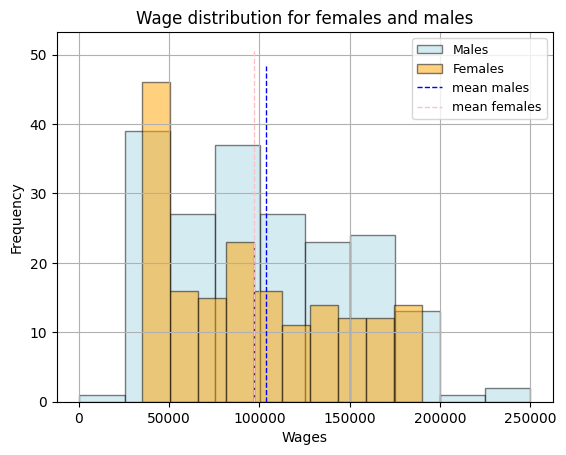

In [35]:
# I create a histogram for each gender
plt.hist(data[data['gender_str']=='Male']['wage'], alpha=0.5, color='lightblue', edgecolor='black', label='Males')
plt.hist(data[data['gender_str']=='Female']['wage'], alpha=0.5, color='orange', edgecolor='black', label='Females')

# Add a vertical line for the mean of the distributions 
plt.plot([df[df['gender_str']=='Male']['wage'].mean(), df[df['gender_str']=='Male']['wage'].mean()], [0, plt.ylim()[1]], '--', color='blue', linewidth=1)
plt.plot([df[df['gender_str']=='Female']['wage'].mean(), df[df['gender_str']=='Female']['wage'].mean()], [0, plt.ylim()[1]], '--', color='pink', linewidth=1)

plt.xlabel('Wages')
plt.ylabel('Frequency',fontsize=10)
plt.title('Wage distribution for females and males')
plt.legend(labels=['Males', 'Females', 'mean males', 'mean females'],fontsize=9)
plt.grid(True)
plt.show()

The two competing hypothesis are  


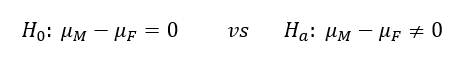

where

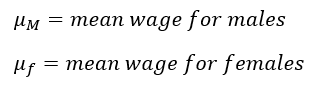

The significance level is 5%. The statistic chosen is T due to the fact of unknown variances. There is a difference in the standard deviation formula used to calculate the observed value for T depending on assumptions about the variances for females and males. 

Under the equal variances assumption, the correct statistic is: 

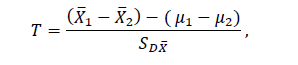

where

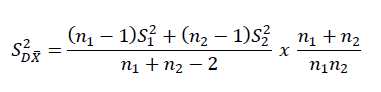

and
*   n1: total males 
*   n2: total females

*   S1: sampling standard deviation for males
*   S2: sampling standard deviation for females

If the variances are unnequal, the correct formula is

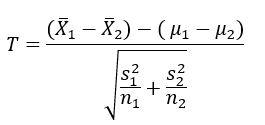

In order to choose the correct formula, an equal variances test should be performed. In this case, the Levene test will be used (included in scipy).
The competing hypothesis for this case will be:


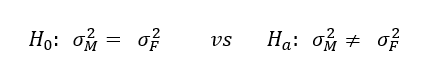

where

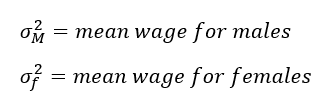

In [36]:
#First I filter observations 
wage_men=data[data['gender_str']=='Male']['wage']
wage_women=data[data['gender_str']=='Female']['wage']

In [37]:
from scipy.stats import levene
statistic, p_value = levene(wage_men, wage_women)

# Results:
print("Lavene test for equal variances")
print("L statistic: ", round(statistic,2))
print("P-value: ", round(p_value,2))

Lavene test for equal variances
L statistic:  0.71
P-value:  0.4


The conclusion of the test is that the null hypothesis cannot be rejected. In other words, the correct t statistic is the one with equal variances.  

In [38]:
from scipy.stats import ttest_ind

#hypothesis test
t_stat,p_value=ttest_ind(wage_men,wage_women,equal_var=True)

# Results
print('Two samples t test')
print('t statistic:',round(t_stat,2))
print('P-value:',round(p_value,2))

Two samples t test
t statistic: 1.37
P-value: 0.17


The results indicate that the null hypothesis cannot be rejected. That is to say, with a significance of 5%, it cannot be rejected the affirmation that mean wages for males and females are equal, when gender is the only variable taken into account. 

These results are consistent with the violin plot presented below. Although there seems to be differences at first sight in the wages distribution between women and men, these qualify when considered the hypotesis tests presented before. 

In [39]:
fig = px.violin(data, x='gender_str', y='wage', color='gender_str', box=True, points='all')
fig.update_layout(
    title="Wages distribution by gender"
    )
fig.update_xaxes(title='Gender')
fig.update_yaxes(title='Wage')
fig.show()

#### Wage versus gender, considering experience

Another variable that influence wages is experience: it is expected that as working years increase, wages will also tend to raise. This is confirmed in the data, as the plot presented shows. 

[]

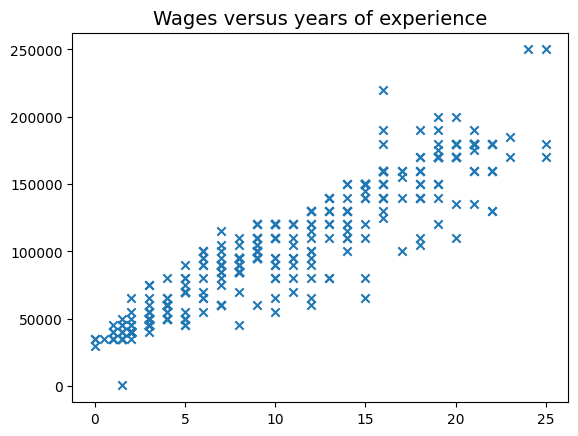

In [40]:
# Scatter for wages and years of experience
plt.scatter(data['experience'],data['wage'],marker='x')
plt.title('Wages versus years of experience',fontsize=14,loc='center')
plt.plot()

This pattern is almost identical when introduced gender into the analysis. The next graphic shows that there is indeed a positive difference in mean wages in favor of men for the same experience years. Nevertheless, this discrepancy does not seem to be very signignificative economically.  

In [41]:
fig = px.scatter(data, x='experience', y='wage', color='gender_str', trendline='ols')
fig.update_layout(
    title="Wages versus years of experience by gender"
    )
fig.update_xaxes(title='Years of experience')
fig.update_yaxes(title='Wage')
fig.show()

This pattern can also be found for age: wages have a little positive difference for men for the same years of age.

In [48]:
fig = px.scatter(data, x='Age', y='wage', color='gender_str', trendline='ols')
fig.update_layout(
    title="Wages versus years of age by sex",
    )
fig.show()

Now, I will like to check for patterns in wages by gender considering the same levels of education. For that, I will create dummies for each level of education in the dataset (bachelor, master, and PhD).

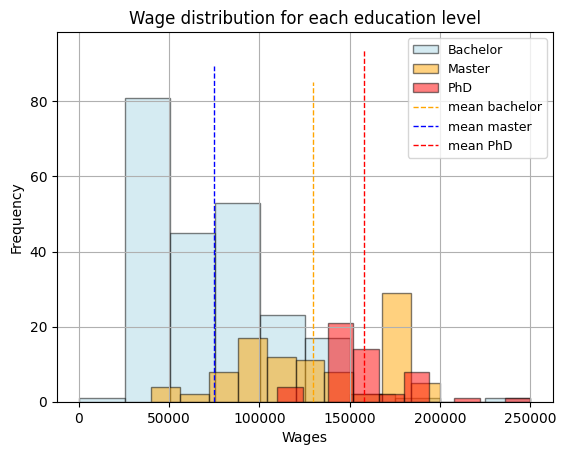

In [72]:
# I create dummies for each educational level
df_dummies = pd.get_dummies(df['education_str'], prefix='education')

# I add these columns to the dataset
df = pd.concat([df, df_dummies], axis=1)

#Histograms for each educational level 
plt.hist(data[data['education_str']=="Bachelor's"]['wage'], alpha=0.5, color='lightblue', edgecolor='black', label="Bachelor")
plt.hist(data[data['education_str']=="Master's"]['wage'], alpha=0.5, color='orange', edgecolor='black', label="Master")
plt.hist(data[data['education_str']=="PhD"]['wage'], alpha=0.5, color='red',edgecolor='black', label="PhD")

plt.xlabel('Wages')
plt.ylabel('Frequency',fontsize=10)
plt.title('Wage distribution for each education level')

plt.grid(True)

# Add a vertical line for the mean of the distributions 
plt.plot([data[data['education_str']=="Master's"]['wage'].mean(), data[data['education_str']=="Master's"]['wage'].mean()], [0, plt.ylim()[1]], '--', color='orange', linewidth=1)
plt.plot([data[data['education_str']=="Bachelor's"]['wage'].mean(), data[data['education_str']=="Bachelor's"]['wage'].mean()], [0, plt.ylim()[1]], '--', color='blue', linewidth=1)
plt.plot([data[data['education_str']=='PhD']['wage'].mean(), data[data['education_str']=='PhD']['wage'].mean()], [0, plt.ylim()[1]], '--', color='red', linewidth=1)

plt.legend(labels=['Bachelor', 'Master', 'PhD','mean bachelor','mean master','mean PhD'], fontsize=9)        
plt.show()


In [73]:
# I create separate dataframes
data_bachelor = data[data['education_str'] == "Bachelor's"]
data_master= data[data['education_str'] == "Master's"]
data_doctor = data[data['education_str'] == "PhD"]

# Descriptive statistics by gender
print(" Descriptive statistics for bachelor:\n",'\n', data_bachelor['wage'].describe().round(2))
print('\n')
print(" Descriptive statistics for master:\n",'\n', data_master['wage'].describe().round(2))
print('\n')
print(" Descriptive statistics for doctorates:\n",'\n', data_doctor['wage'].describe().round(2))

 Descriptive statistics for bachelor:
 
 count       224.00
mean      74756.03
std       34777.27
min         350.00
25%       45000.00
50%       65000.00
75%       95000.00
max      250000.00
Name: wage, dtype: float64


 Descriptive statistics for master:
 
 count        98.00
mean     129795.92
std       41659.63
min       40000.00
25%       95000.00
50%      120000.00
75%      170000.00
max      200000.00
Name: wage, dtype: float64


 Descriptive statistics for doctorates:
 
 count        51.00
mean     157843.14
std       23393.48
min      110000.00
25%      150000.00
50%      155000.00
75%      160000.00
max      250000.00
Name: wage, dtype: float64


As both the histograms and the descriptivie statistics show, wages vary depending on the eductional level of the worker. 


*   As analysed before, the more numerous cathegory is bachelor, with 224 registers versus 98 for master, and only 51 for doctorates. 

*   The median of the distribution increases with th educational level: for bachelor's is 65000 per annum, 120000 for masters, and 155000 for PhD. 
*   The dispersion of data also vary. Wages for bachelors have the greatest dispersion, followed by PhD, and last masters.


So, not only does central tendency values differ among different educational backrounds, but also standar deviation.



In [52]:
# Plot
fig = px.box(data, x='education_str', y='wage', color='gender_str', points='all')
fig.update_traces(quartilemethod="exclusive")
fig.update_layout(
    title="Wages distribution by educational level and sex"
)
fig.update_xaxes(title="Educational level")
fig.update_yaxes(title='')
fig.show()

This pattern can also be seen when introduced the `gender_str` variable. Although some particularities appear when analysed visually: 
*   For women with a bachelor or PhD, the wages posibilities are less disperse than their male counterparts
*   In the case of master's, the reverse holds true: women have a more variable  wage distribution than men. 
*   For people with a master level, males will likely have a higher wage than a women.

In 